# CS 6476 Project 1: Image Filtering and Hybrid Images

All projects in this course will be executed within an iPython notebook. Using an IPython notebooks is a convenient way for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).


## Part 1: NumPy
### Setup
Before we get started, we'll do a quick check to ensure you've previously installed the `vision` module by running the command `pip install -e .` in your terminal:

In [1]:
import sys
sys.path.insert(0, 'src')

In [2]:
from vision.utils import load_image, save_image

If that didn't throw an error, then you're good to proceed!

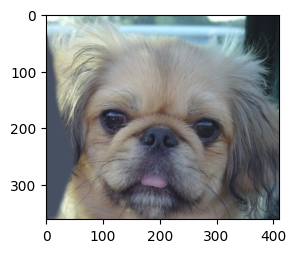

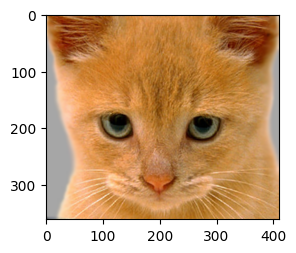

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from vision.utils import load_image, save_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

image1 = load_image('data/1a_dog.bmp')
image2 = load_image('data/1b_cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8));

### Create filter

You will first need to implement `create_Gaussian_kernel_1D()`  in `part1.py`.

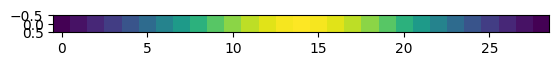

In [4]:
from vision.part1 import create_Gaussian_kernel_1D
ksize = 29
sigma = 7
kernel_1d = create_Gaussian_kernel_1D(ksize, sigma)
plt.imshow(kernel_1d.T) # plot (N,1) column vector as (1,N) row vector 

You can run these two simple test cases to check if the implementation seems correct:

In [5]:
from vision.utils import verify
from tests.test_part1 import (
    test_create_Gaussian_kernel_1D,
    test_create_Gaussian_kernel_1D_sumsto1,
    test_create_Gaussian_kernel_1D_peak
)

print(verify(test_create_Gaussian_kernel_1D))
print(verify(test_create_Gaussian_kernel_1D_sumsto1))
print(verify(test_create_Gaussian_kernel_1D_peak))

"Correct"
"Correct"
"Correct"


Next, you will need to implement `create_Gaussian_kernel_2D()` (which can use `create_Gaussian_kernel_1D`)  in `part1.py`.

"Correct"
"Correct"
"Correct"
"Correct"
"Correct"


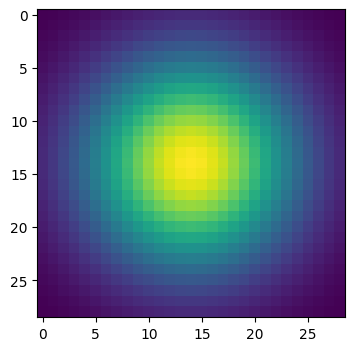

In [6]:
from vision.part1 import create_Gaussian_kernel_2D
from vision.utils import verify, PIL_resize
from tests.test_part1 import (
    test_create_Gaussian_kernel_2D_sumsto1,
    test_create_Gaussian_kernel_2D_peak,
    test_gaussian_kernel_2D
)

cutoff_frequency = 7
kernel = create_Gaussian_kernel_2D(cutoff_frequency)

# let's take a look at the filter!
plt.figure(figsize=(4,4)); plt.imshow(kernel)

## Verify that the Gaussian kernel was created correctly
print(verify(test_create_Gaussian_kernel_1D_sumsto1))
print(verify(test_create_Gaussian_kernel_1D_peak))
print(verify(test_create_Gaussian_kernel_2D_sumsto1))
print(verify(test_create_Gaussian_kernel_2D_peak))
print(verify(test_gaussian_kernel_2D))

### Apply filter to image
The next two functions you need to implement in this project can also be found in `part1.py`. Start by implementing `my_conv2d_numpy`, which takes both a filter and an image, and returns the filtered image. This code block will use your `my_conv2d_numpy` function to create and display a blurry version of image1.

"Correct"
"Correct"
"Correct"


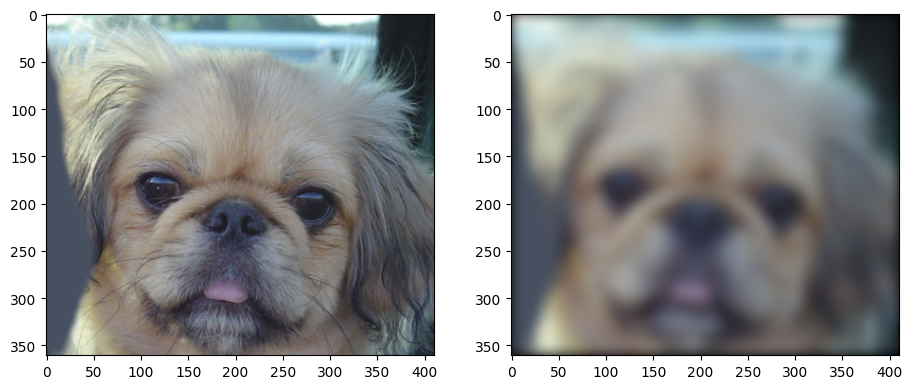

In [13]:
from vision.part1 import (
    my_conv2d_numpy,
    create_hybrid_image
)
from tests.test_part1 import (
    test_my_conv2d_numpy_identity,
    test_my_conv2d_numpy_ones_filter,
    test_my_conv2d_numpy_nonsquare_filter
)

blurry_image = my_conv2d_numpy(image1, kernel)

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(image1)
plt.subplot(1,2,2); plt.imshow((blurry_image*255).astype(np.uint8))

## Verify that my_conv2d_numpy() was implemented correctly
print(verify(test_my_conv2d_numpy_identity))
print(verify(test_my_conv2d_numpy_ones_filter))
print(verify(test_my_conv2d_numpy_nonsquare_filter))

## Test Filtering

Here are a few test cases to help you test `my_conv2d_numpy()`, which you will write. You should verify that you get reasonable output here before using your filtering to construct a hybrid image in `part1.py`. The outputs are all saved and you can include them in your writeup.

In [15]:
test_image = load_image('data/1b_cat.bmp')
original_height = test_image.shape[0]
original_width = test_image.shape[1]
test_image = PIL_resize(test_image, (int(0.7*original_width), int(0.7*original_height)))

### Identity filter
For the identity filter, the filtering result should look identical to the input.

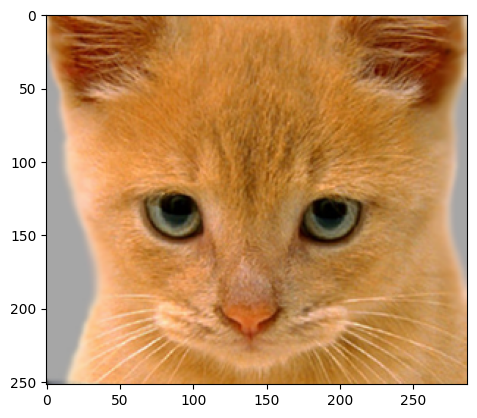

In [16]:
identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
identity_image = my_conv2d_numpy(test_image, identity_filter)
plt.imshow(identity_image)
done = save_image('results/part1/identity_image.jpg', identity_image)

### Small blur with a box filter
This filter should remove some high frequencies. (See the effect on the cat's whiskers, for example.)

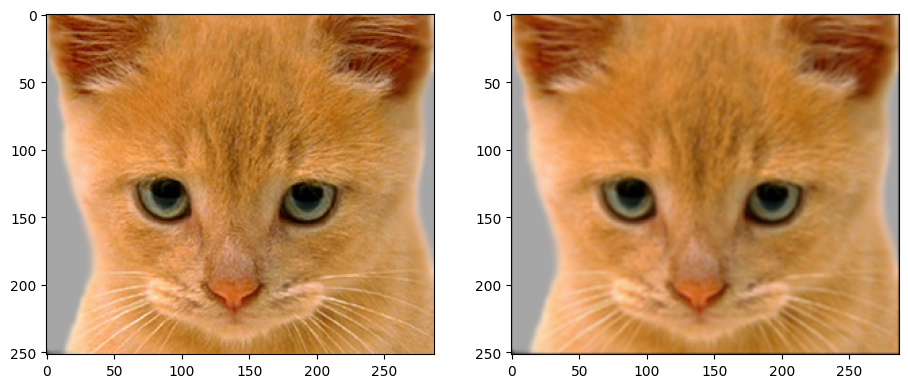

In [17]:
blur_filter = np.ones((3,3)) 
blur_filter /= np.sum(blur_filter)  # making the filter sum to 1
blur_image = my_conv2d_numpy(test_image, blur_filter)
plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(test_image)
plt.subplot(1,2,2); plt.imshow(blur_image)
done = save_image('results/part1/blur_image.jpg', blur_image)

### Oriented filter (Sobel operator)

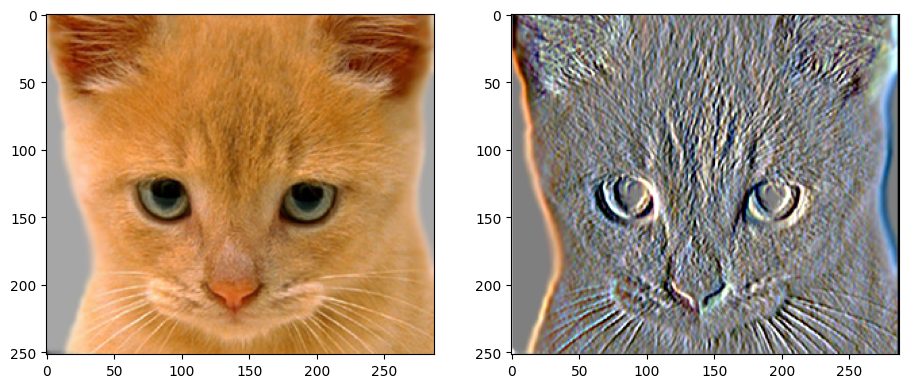

In [18]:
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # should respond to horizontal gradients
sobel_image = my_conv2d_numpy(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(test_image)
plt.subplot(1,2,2); plt.imshow(sobel_image)
done = save_image('results/part1/sobel_image.jpg', sobel_image)

### High pass filter (discrete Laplacian)

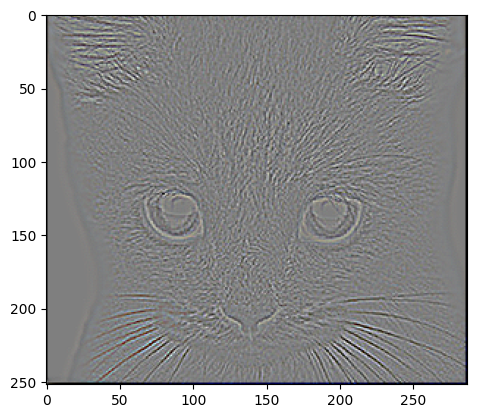

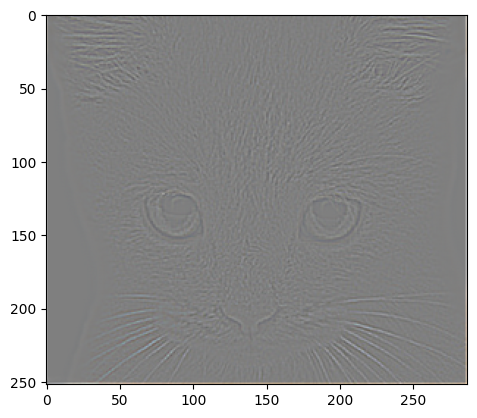

In [19]:
laplacian_filter = np.asarray([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = my_conv2d_numpy(test_image, laplacian_filter)

# 0.5 is added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(laplacian_image)
done = save_image('results/part1/laplacian_image.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(high_pass_image)
done = save_image('results/part1/high_pass_image.jpg', high_pass_image)

## Create hybrid image
Next, implement `create_hybrid_image()`, which takes two images and makes a hybrid image using the low frequency content from one image and the high frequency content from another by applying the Gaussian kernel you defined in `create_Gaussian_kernel_2D()`.

Experiment with the value of `cutoff_frequency` for each pair of images in `data/`. For each image pair, replace `cutoff_frequencies.txt` with the best cutoff frequency value you find. The value on line *i* of the text file should correspond to _i_-th image pair. This is an important step for Part 2! Feel free to also experiment with which image in each pair you grab the low frequencies from and which image you grab high frequencies from.

In [ ]:
from vision.utils import vis_image_scales_numpy
from tests.test_part1 import test_hybrid_image_np

low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, kernel)

## Verify that results are as expected
print(verify(test_hybrid_image_np))

vis = vis_image_scales_numpy(hybrid_image)

### Show results

In [ ]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow((low_frequencies*255).astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8))
plt.figure(figsize=(20, 20)); plt.imshow(vis)

### Save results

In [73]:
save_image('results/part1/low_frequencies.jpg', low_frequencies)
save_image('results/part1/high_frequencies.jpg', high_frequencies+0.5)
save_image('results/part1/hybrid_image.jpg', hybrid_image)
save_image('results/part1/hybrid_image_scales.jpg', vis)

## Part 2: PyTorch 

Make sure you have specified a cutoff value in `cutoff_frequencies.txt` for each image pair in `data/` before executing the following blocks.

In [74]:
import torch
import torchvision
import os

from vision.part2_datasets import HybridImageDataset
from vision.part2_models import HybridImageModel

if not os.path.exists('results/part2/'):
        os.makedirs('results/part2/')
        
data_root = 'data' # if you're using additional data, make sure to change this to '../additional_data'
cf_file = 'cutoff_frequencies.txt'

### Instantiate model & dataset
Implement `HybridImageModel` and `HybridImageDataset`, found in `part2_models.py` and `part2_datasets.py`, respectively.

In the code documentation, you will see a term called "batch size", which we will discuss in later projects and lectures. For now, we are using the default value of 1. 

In [75]:
model = HybridImageModel()
dataset = HybridImageDataset(data_root, cf_file)
dataloader = torch.utils.data.DataLoader(dataset)

data_iter = iter(dataloader)

### Create hybrid images
This code block will iterate through pairs of images from your dataset and create a hybrid image using the low frequency content from one image and the high frequency content from another.

In [76]:
for i in range(len(dataset)):
    image_a, image_b, cutoff_frequency = next(data_iter)
    low_frequencies, high_frequencies, hybrid_image = model(image_a, image_b, cutoff_frequency)
    
    # saves low frequencies, high frequencies, and hybrid image of each pair of images
    torchvision.utils.save_image(low_frequencies, 'results/part2/%d_low_frequencies.jpg' % i)
    torchvision.utils.save_image(high_frequencies+0.5, 'results/part2/%d_high_frequencies.jpg' % i)
    torchvision.utils.save_image(hybrid_image, 'results/part2/%d_hybrid_image.jpg' % i)

In [ ]:
## Verify that the results are correct
from tests.test_part2 import (
    test_low_freq_sq_kernel_pytorch, 
    test_high_freq_sq_kernel_pytorch,
    test_hybrid_image_pytorch
)

## Verify that the Pytorch results are as expected
print(verify(test_low_freq_sq_kernel_pytorch))
print(verify(test_high_freq_sq_kernel_pytorch))
## Verify that the Pytorch hybrid images are created correctly
print(verify(test_hybrid_image_pytorch))

### Hybrid image timing comparison
Here, we will compare the runtime of creating hybrid images using your NumPy implementation to using your PyTorch implementation.

In [78]:
import time

image1 = load_image('data/1a_dog.bmp')
image2 = load_image('data/1b_cat.bmp')

Timing Part 1. Notice that we explicitly include `create_Gaussian_kernel()_2D` in the timing of Part 1 but not Part 2. This is because the function is already being called (and therefore timed) inside the forward pass of `HybridImageModel`.

In [ ]:
start = time.time()
cutoff_frequency = 7
kernel = create_Gaussian_kernel_2D(cutoff_frequency)
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, kernel)
end = time.time() - start
print('Part 1: {:.3f} seconds'.format(end))

Timing Part 2

In [ ]:
model = HybridImageModel()

start = time.time()
low_frequencies, high_frequencies, hybrid_image = model(image_a, image_b, torch.Tensor([cutoff_frequency]))
end = time.time() - start
print('Part 2: {:.3f} seconds'.format(end))

## Part 3: Understanding input/output shapes in PyTorch
Up until this point, we have produced a filtered output that has the same dimensions as the input image. Let's explore how you can stack multiple filters, apply them in a single operation using your `my_conv2d_pytorch` implementation in `part3.py`, and see how it affects the output shape.

In [ ]:
from tests.test_part3 import test_my_conv2d_pytorch

# Verify that feature maps are correctly created
print(verify(test_my_conv2d_pytorch))

In [ ]:
image = load_image('data/1a_dog.bmp')

# turn HW image into CHW, where C=1 for grayscale
image = np.transpose(image, (2,0,1))
print('Image has shape: ', image.shape)
image = torch.from_numpy(image).unsqueeze(0) #convert to tensor and add batch dimension

In [ ]:
from vision.part3 import my_conv2d_pytorch

# stack all the test filters along the channel dimension
filter_bank = np.stack(
    [
        [identity_filter], 
        [blur_filter],
        [sobel_filter], 
        [laplacian_filter],
        [identity_filter], 
        [blur_filter],
        [sobel_filter], 
        [laplacian_filter],
        [identity_filter], 
        [blur_filter],
        [sobel_filter], 
        [laplacian_filter]
    ])
print('Filter bank has shape: ', filter_bank.shape)

filter_bank = torch.from_numpy(filter_bank).float()
# Run the image filtering operation
feature_maps = my_conv2d_pytorch(image, filter_bank)

Let's take a look at the output shape.

In [ ]:
print(feature_maps.shape)

Matplotlib requires numpy arrays with a particular shape format (h, w, c) for visualizing images. Here, we split and convert `feature_maps` to the appropriate shape arrays.

In [ ]:
for idx in range(4):  # we are stacking 4 filters in the filter bank
    print('Visualization {}:'.format(idx))
    feature_map = feature_maps[0, [idx, idx+4, idx+8], :, :]
    # (c, h, w) --> (h, w, c) for matplotlib visualization purposes
    feature_map = np.transpose(feature_map.numpy(),(1,2,0))
    plt.figure()
    offset = 0 #offset for vis purposes. sobel and laplace use .5
    if idx > 1:
        offset = .5
    plt.imshow(np.clip(feature_map+offset,0,1))
    plt.show()
    save_image('results/part3/visualization_{}.jpg'.format(idx), np.clip(feature_map+offset,0,1))

## Part 4: Convolution in the Frequency Domain

In Part 1, we implemented the convolution operation, by moving a filter over an image and calculating a element-wise product at each pixel. 

In this section, we will implement the same operation using a different approach. We can do this by representing both the image and filter in the *frequency* domain and applying the *Convolution Theorem*. See the handout for more specific math and broader guidelines.

You should use the following functions in this section for operations relating to 2-dimensional Discrete Fourier Transform (FFT):
- `np.fft.fft2` and `np.fft.ifft2` - useful for performing FFT and iFFT
- `np.fft.ifftshift` - useful for plotting FFT results in a more familiar format
- `np.real` - useful for plotting real components of complex results

You should not use any other modules or libraries to perform convolution or deconvolution, but using `numpy` to handle the images is still encouraged.

### Frequency Domain Convolution

Start by implementing `my_conv2d_freq` in `part4.py`. The following cells will help you visualize your results. We are testing with a basic Gaussian filter, so your results should look similar to results with this filter above. However, you may get a grid-like artifact in the frequency domain of the blurred image. This is caused by aliasing from cutting off the Gaussian at a finite size (since Gaussians go on infinitely). The aliasing is further stretched by the `np.log` and you'll notice the same thing if you add `np.log` to the frequency domain representation of the Gaussian. But this is outside the scope of the course.

In [ ]:
from vision.part4 import my_conv2d_freq, my_deconv2d_freq
from vision.utils import rgb2gray

image = rgb2gray(load_image('data/1a_dog.bmp'))
kernel = create_Gaussian_kernel_2D(7)

fft_image, fft_kernel, fft_conv_result, conv_result = my_conv2d_freq(image,kernel)


plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(image, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(fft_image))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(kernel)
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift((np.abs(fft_kernel))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(conv_result, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(fft_conv_result))))

### Frequency Domain Deconvolution

Next, we will undo this convolution in `my_deconv2d_freq`. The following cells will help you visualize your results. If your deconvolution works properly, you will recover the original image.

In [ ]:
image_freq, filter_freq, deconv_freq, deconv = my_deconv2d_freq(conv_result, kernel)

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(conv_result, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(image_freq))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(kernel)
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift((np.abs(filter_freq))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(deconv, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(deconv_freq))))

The results above have shown us that we can take an image and convolve with a kernel in the frequency domain. We can also reverse this operation if we know the kernel. 

Let's try with another image. This time, we will start with an image that has already been blurred by a kernel, which we are also given. 

In [ ]:
mystery_kernel = np.load('data/part4/kernel.npy')
mystery_image = np.load('data/part4/mystery.npy')

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(mystery_image, cmap='gray')
plt.subplot(1,2,2); plt.imshow(mystery_kernel)


If your deconvolution works properly, you will be able to recover the original image given the image and kernel above.

In [ ]:
image_freq, filter_freq, deconv_freq, deconv = my_deconv2d_freq(mystery_image, mystery_kernel)

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(mystery_image, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(image_freq))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(mystery_kernel)
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(filter_freq))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(deconv, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(deconv_freq))))

This seems to work well, but what happens when we add a small amount of salt and pepper noise? Can we still recover the original image?

In [90]:
prob = 0.0001

probs = np.random.random((mystery_image.shape[0], mystery_image.shape[1]))
mystery_image[probs < prob] = 0
mystery_image[probs > 1 - prob] = 255

In [ ]:
image_freq, filter_freq, deconv_freq, deconv = my_deconv2d_freq(mystery_image, mystery_kernel)

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(mystery_image, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(image_freq))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(mystery_kernel)
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(filter_freq))))

plt.figure(figsize=(11,6))
plt.subplot(1,2,1); plt.imshow(deconv, cmap='gray')
plt.subplot(1,2,2); plt.imshow(np.fft.ifftshift(np.log(np.abs(deconv_freq))))